In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import matplotlib.pyplot as plt
import os
import anndata
import harmonypy as hm
import seaborn as sns


In [2]:
%matplotlib inline

import glob
from statannotations.Annotator import Annotator
from itertools import combinations
from matplotlib import rcParams

In [3]:
sc.settings.set_figure_params(dpi=300,fontsize=15)

In [4]:
A1_1 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/A1-1.csv")

In [5]:
A1_2 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/A1-2.csv")

In [6]:
A2_1 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/A2-1.csv")

In [7]:
A2_2 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/A2-2.csv")

In [8]:
A2_3 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/A2-3.csv")

In [9]:
B1_1 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/B1-1.csv")

In [10]:
B1_2 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/B1-2.csv")

In [11]:
B1_3 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/B1-3.csv")

In [12]:
B1_4 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/B1-4.csv")

In [13]:
B2_1 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/B2-1.csv")

In [14]:
B2_2 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/B2-2.csv")

In [15]:
C2_1 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/C2-1.csv")

In [16]:
C2_2 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/C2-2.csv")

In [17]:
C2_3 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/C2-3.csv")

In [18]:
D1_1 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/D1-1.csv")

In [19]:
D1_2 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/D1-2.csv")

In [20]:
D2_1 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/D2-1.csv")

In [21]:
D2_2 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/D2-2.csv")

In [22]:
D2_3 = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Final_Datasets_June2023/Thesis/FA_quantification/D2-3.csv")

In [23]:
results = pd.concat([A1_1,A1_2,A2_1,A2_2,A2_3,B1_1,B1_2,B1_3,B1_4,B2_1,B2_2,C2_1,C2_2,C2_3,D1_1,D1_2,D2_1,D2_2,D2_3], axis=0)

In [24]:
results

,Unnamed: 0,FABP4_percent,MEOX2_percent,TCF15_percent,FABP4+MEOX2_percent,MEOX2+TCF15_percent,FABP4+TCF15_percent,FABP4+MEOX2+TCF15_percent,FABP4_mean_expression,MEOX2_mean_expression,TCF15_mean_expression,FABP4_raw_expression,MEOX2_raw_expression,TCF15_raw_expression,vessel,ROI
0,ROI_A1-1_art_ec,0.822222,0.377778,0.155556,0.377778,0.133333,0.155556,0.133333,4.377778,0.533333,0.200000,197.0,24.0,9.0,art_ec,A1-1
1,ROI_A1-1_cap_ec,0.845395,0.299342,0.335526,0.273026,0.121711,0.302632,0.111842,3.855263,0.381579,0.546053,1172.0,116.0,166.0,cap_ec,A1-1
2,ROI_A1-1_ven_ec,0.049383,0.123457,0.012346,0.012346,0.000000,0.000000,0.000000,0.061728,0.148148,0.012346,5.0,12.0,1.0,ven_ec,A1-1
0,ROI_A1-2_art_ec,0.144330,0.041237,0.082474,0.020619,0.020619,0.082474,0.020619,0.556701,0.041237,0.144330,54.0,4.0,14.0,art_ec,A1-2
1,ROI_A1-2_cap_ec,0.734729,0.160558,0.366492,0.129145,0.075044,0.293194,0.062827,2.771379,0.184991,0.537522,1588.0,106.0,308.0,cap_ec,A1-2
2,ROI_A1-2_ven_ec,0.237705,0.229508,0.139344,0.057377,0.024590,0.073770,0.016393,0.614754,0.237705,0.196721,75.0,29.0,24.0,ven_ec,A1-2
0,ROI_A2-1_art_ec,0.449045,0.187898,0.117834,0.181529,0.054140,0.111465,0.054140,1.964968,0.273885,0.181529,617.0,86.0,57.0,art_ec,A2-1
1,ROI_A2-1_cap_ec,0.760063,0.147412,0.340303,0.131208,0.064297,0.294302,0.060115,2.993727,0.187141,0.492420,5727.0,358.0,942.0,cap_ec,A2-1
2,ROI_A2-1_ven_ec,0.120787,0.101124,0.070225,0.005618,0.014045,0.019663,0.002809,0.230337,0.106742,0.078652,82.0,38.0,28.0,ven_ec,A2-1
0,ROI_A2-2_art_ec,0.724138,0.275862,0.241379,0.241379,0.057471,0.206897,0.057471,3.379310,0.379310,0.287356,294.0,33.0,25.0,art_ec,A2-2


In [25]:
vessels = ['art_ec','cap_ec','ven_ec']
pairs = list(combinations(vessels, r=2))
pairs

[('art_ec', 'cap_ec'), ('art_ec', 'ven_ec'), ('cap_ec', 'ven_ec')]

In [26]:
sns.set(rc={'figure.figsize':(0.8,2.5)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(rc={'axes.edgecolor': 'black', 'axes.facecolor' : 'white', 'grid.color': 'whitesmoke', 'xtick.bottom': True, 'ytick.left': True})
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'whitesmoke',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

art_ec vs. cap_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.254e-03 U_stat=6.950e+01
cap_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.480e-07 U_stat=3.610e+02
art_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.638e-03 U_stat=2.840e+02


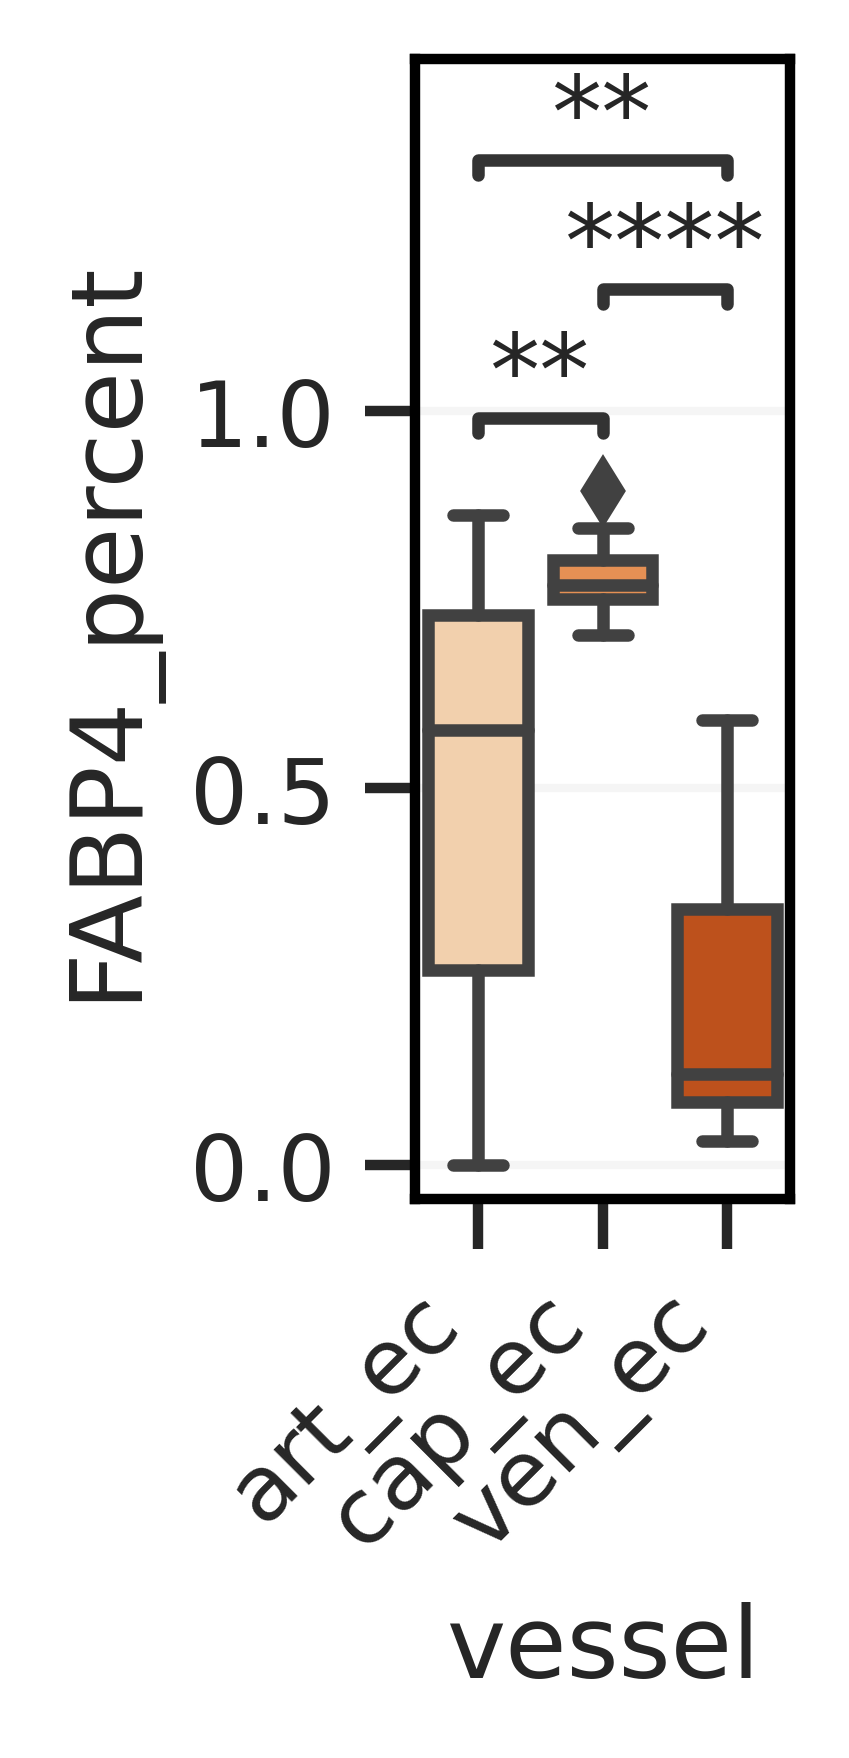

In [27]:
#SULF1 mean expression (bvins only expressed)
ax = sns.boxplot(data = results, x = "vessel", y = "FABP4_percent", palette = 'Oranges', order = ['art_ec','cap_ec','ven_ec'])
annotator = Annotator(ax, pairs, data = results, x = "vessel", y = "FABP4_percent", palette = 'Blues', order = ['art_ec','cap_ec','ven_ec'])
annotator.configure(test="Mann-Whitney", text_format = 'star', loc = 'inside', comparisons_correction='benjamini-hochberg', text_offset=-1)
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
#plt.savefig('SULF1_mean_expression', bbox_inches='tight')
plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

art_ec vs. cap_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.481e-01 U_stat=1.920e+02
cap_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.627e-03 U_stat=2.780e+02
art_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.400e-02 U_stat=2.470e+02


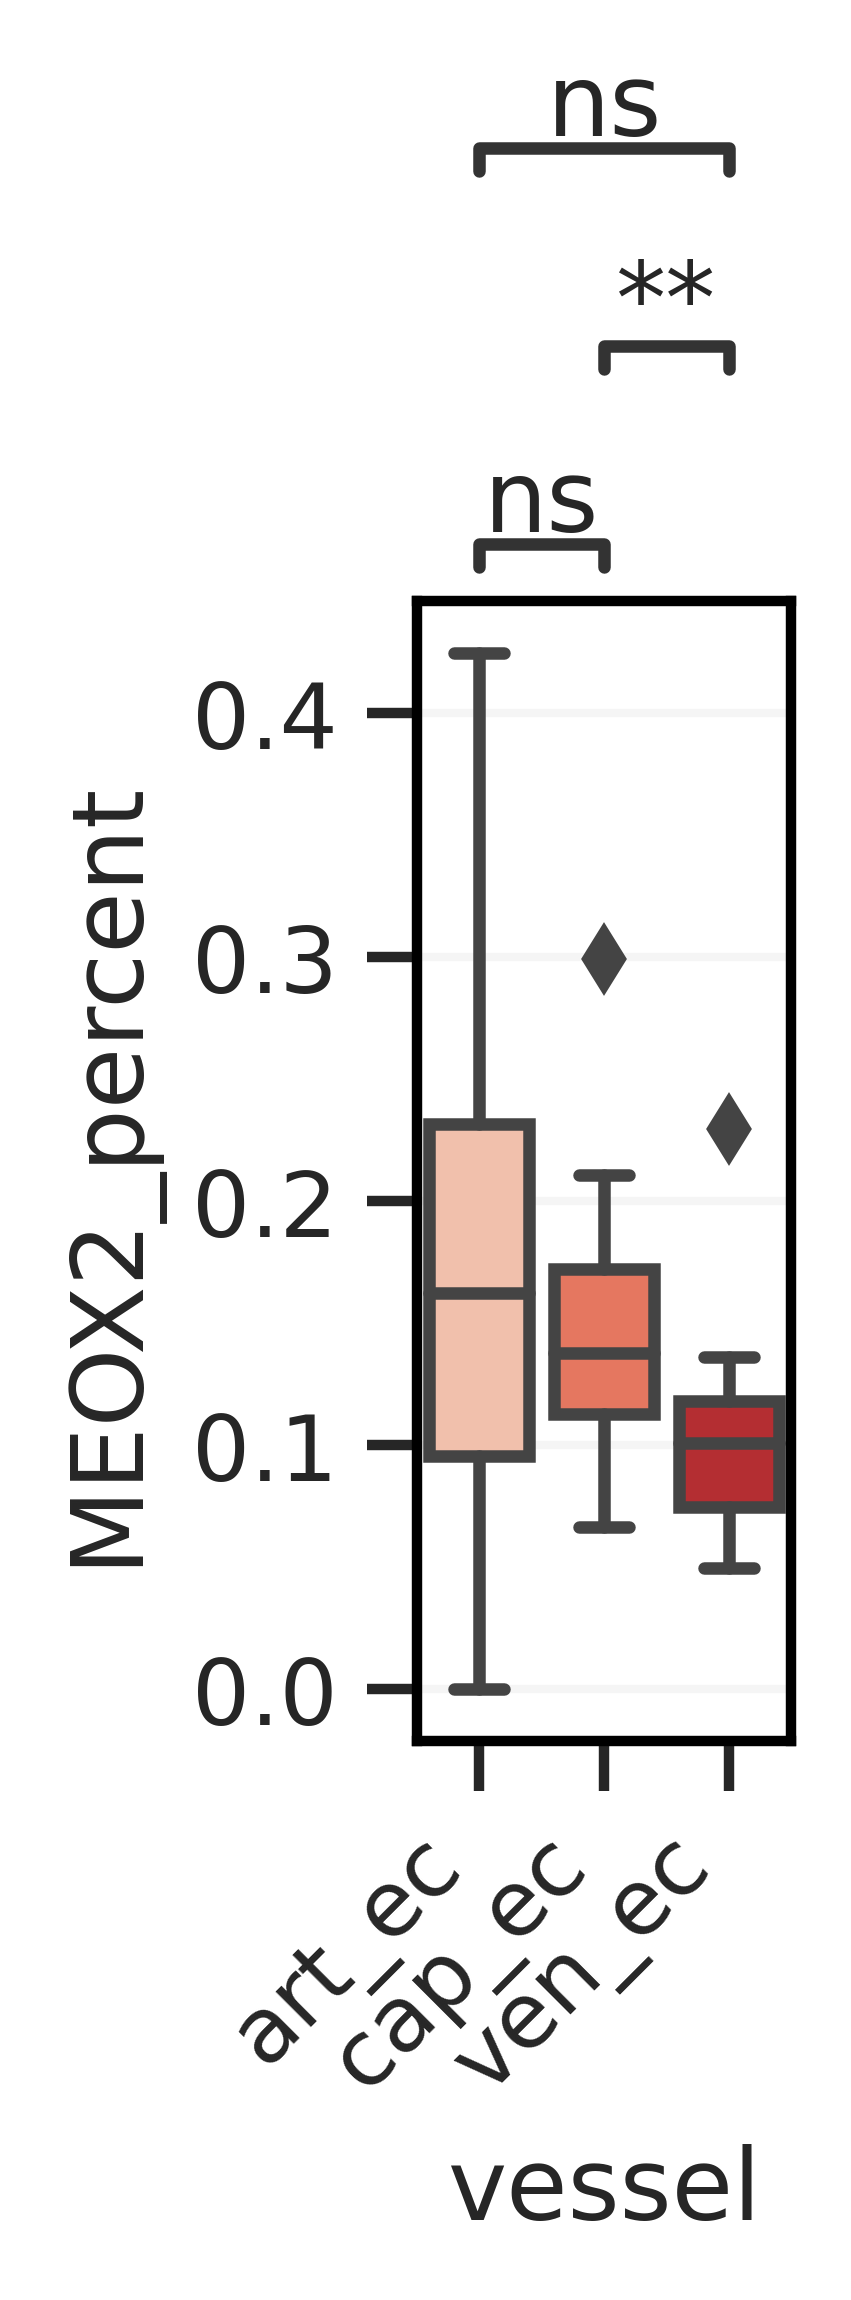

In [86]:
#SULF1 mean expression (bvins only expressed)
ax = sns.boxplot(data = results, x = "vessel", y = "MEOX2_percent", palette = 'Reds', order = ['art_ec','cap_ec','ven_ec'])
annotator = Annotator(ax, pairs, data = results, x = "vessel", y = "MEOX2_percent", palette = 'Blues', order = ['art_ec','cap_ec','ven_ec'])
annotator.configure(test="Mann-Whitney", text_format = 'star', loc = 'outside', comparisons_correction='benjamini-hochberg', text_offset=-1)
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
#plt.savefig('SULF1_mean_expression', bbox_inches='tight')
plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

art_ec vs. cap_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.104e-05 U_stat=4.500e+01
cap_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.477e-07 U_stat=3.610e+02
art_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.841e-03 U_stat=2.800e+02


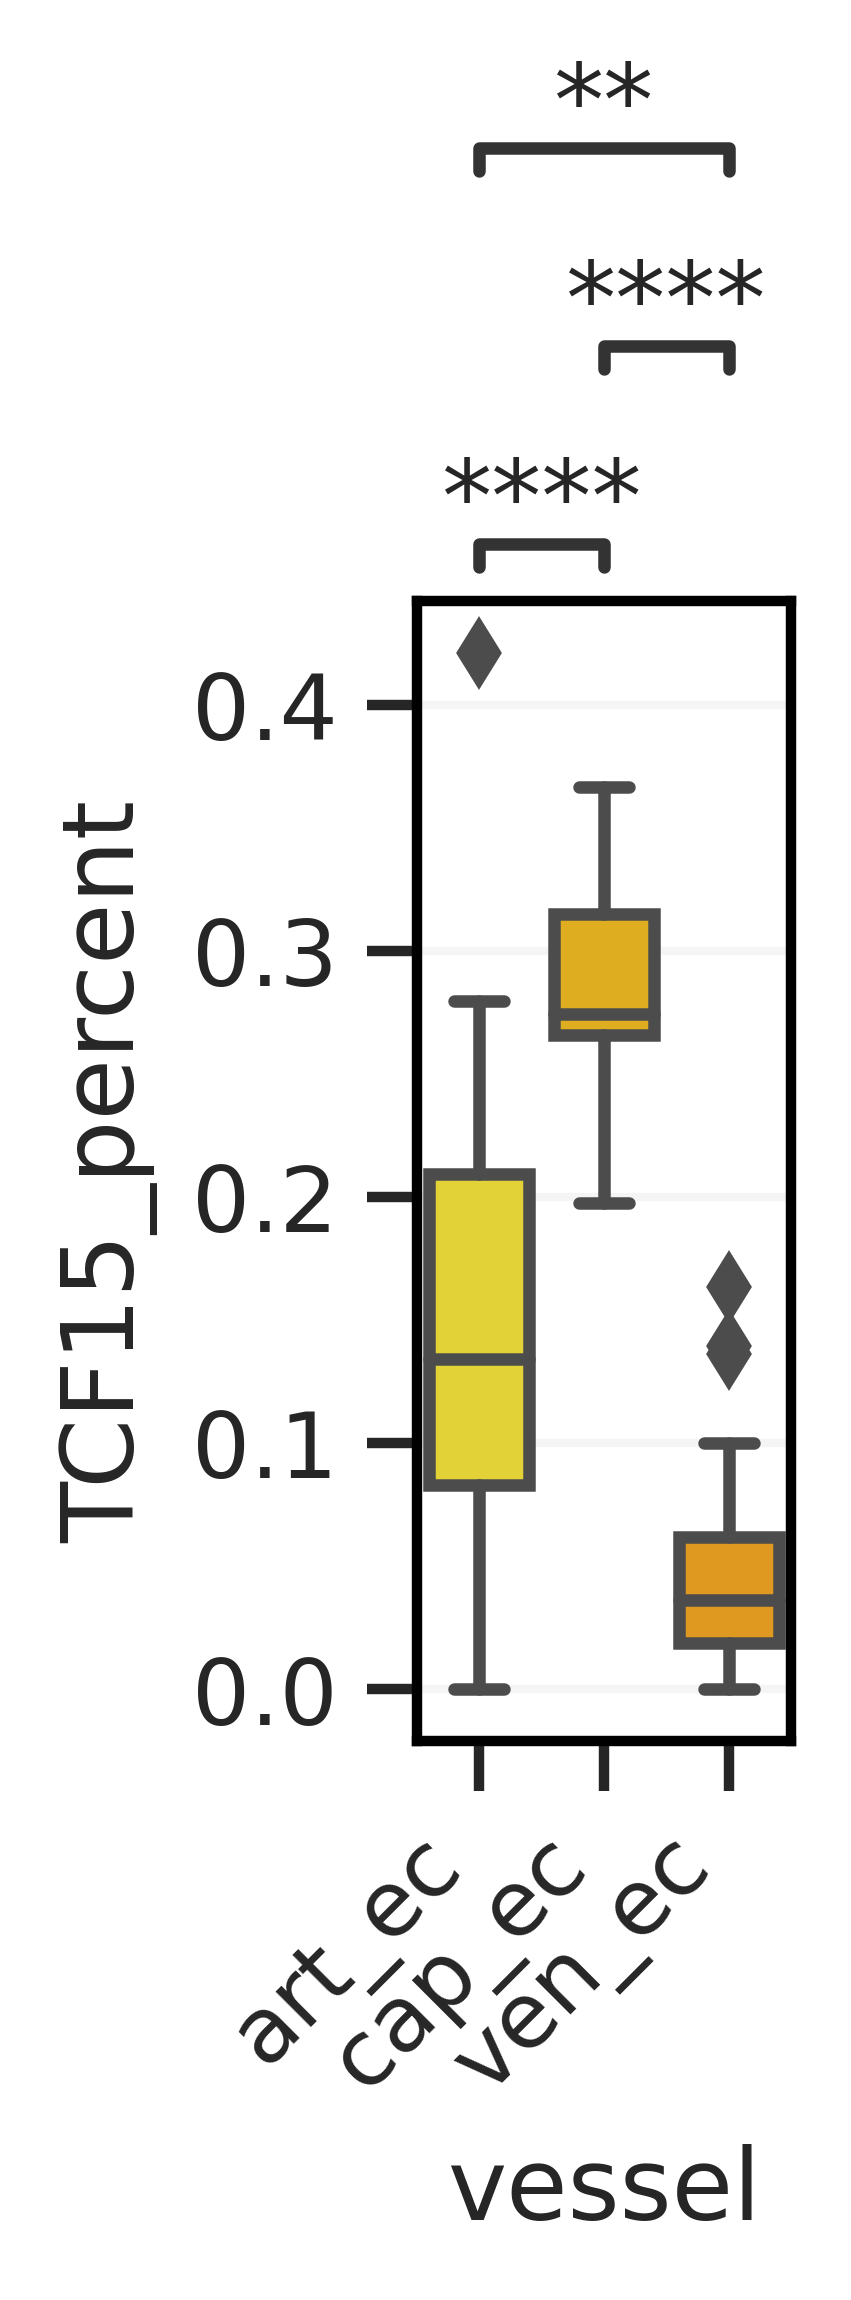

In [88]:
#SULF1 mean expression (bvins only expressed)
ax = sns.boxplot(data = results, x = "vessel", y = "TCF15_percent", palette = 'Wistia', order = ['art_ec','cap_ec','ven_ec'])
annotator = Annotator(ax, pairs, data = results, x = "vessel", y = "TCF15_percent", palette = 'Blues', order = ['art_ec','cap_ec','ven_ec'])
annotator.configure(test="Mann-Whitney", text_format = 'star', loc = 'outside', comparisons_correction='benjamini-hochberg', text_offset=-1)
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
#plt.savefig('SULF1_mean_expression', bbox_inches='tight')
plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

art_ec vs. cap_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.588e-01 U_stat=1.600e+02
cap_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.504e-07 U_stat=3.480e+02
art_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.314e-04 U_stat=3.070e+02


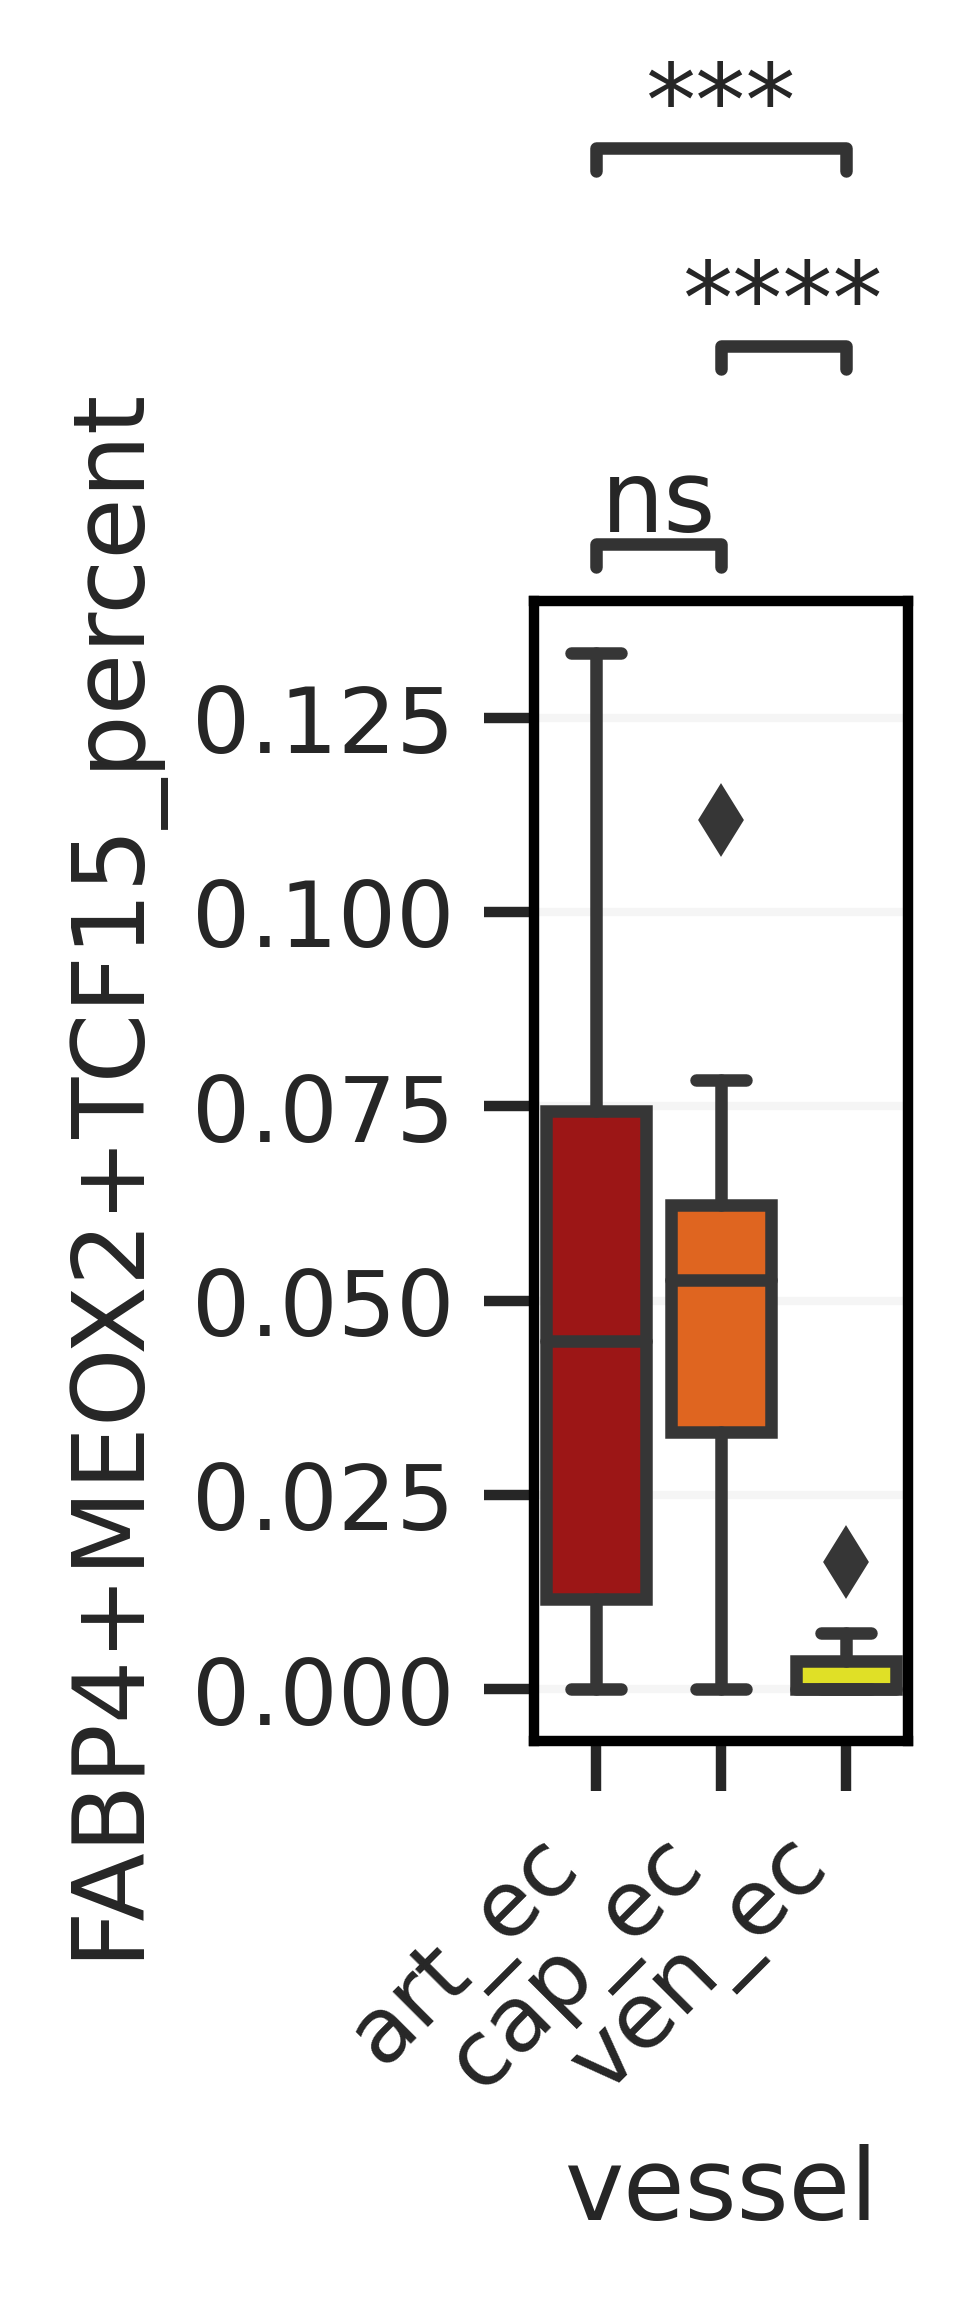

In [89]:
#SULF1 mean expression (bvins only expressed)
ax = sns.boxplot(data = results, x = "vessel", y = "FABP4+MEOX2+TCF15_percent", palette = 'hot', order = ['art_ec','cap_ec','ven_ec'])
annotator = Annotator(ax, pairs, data = results, x = "vessel", y = "FABP4+MEOX2+TCF15_percent", palette = 'Blues', order = ['art_ec','cap_ec','ven_ec'])
annotator.configure(test="Mann-Whitney", text_format = 'star', loc = 'outside', comparisons_correction='benjamini-hochberg', text_offset=-1)
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
#plt.savefig('SULF1_mean_expression', bbox_inches='tight')
plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

art_ec vs. cap_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.588e-01 U_stat=1.600e+02
cap_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.504e-07 U_stat=3.480e+02
art_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.314e-04 U_stat=3.070e+02


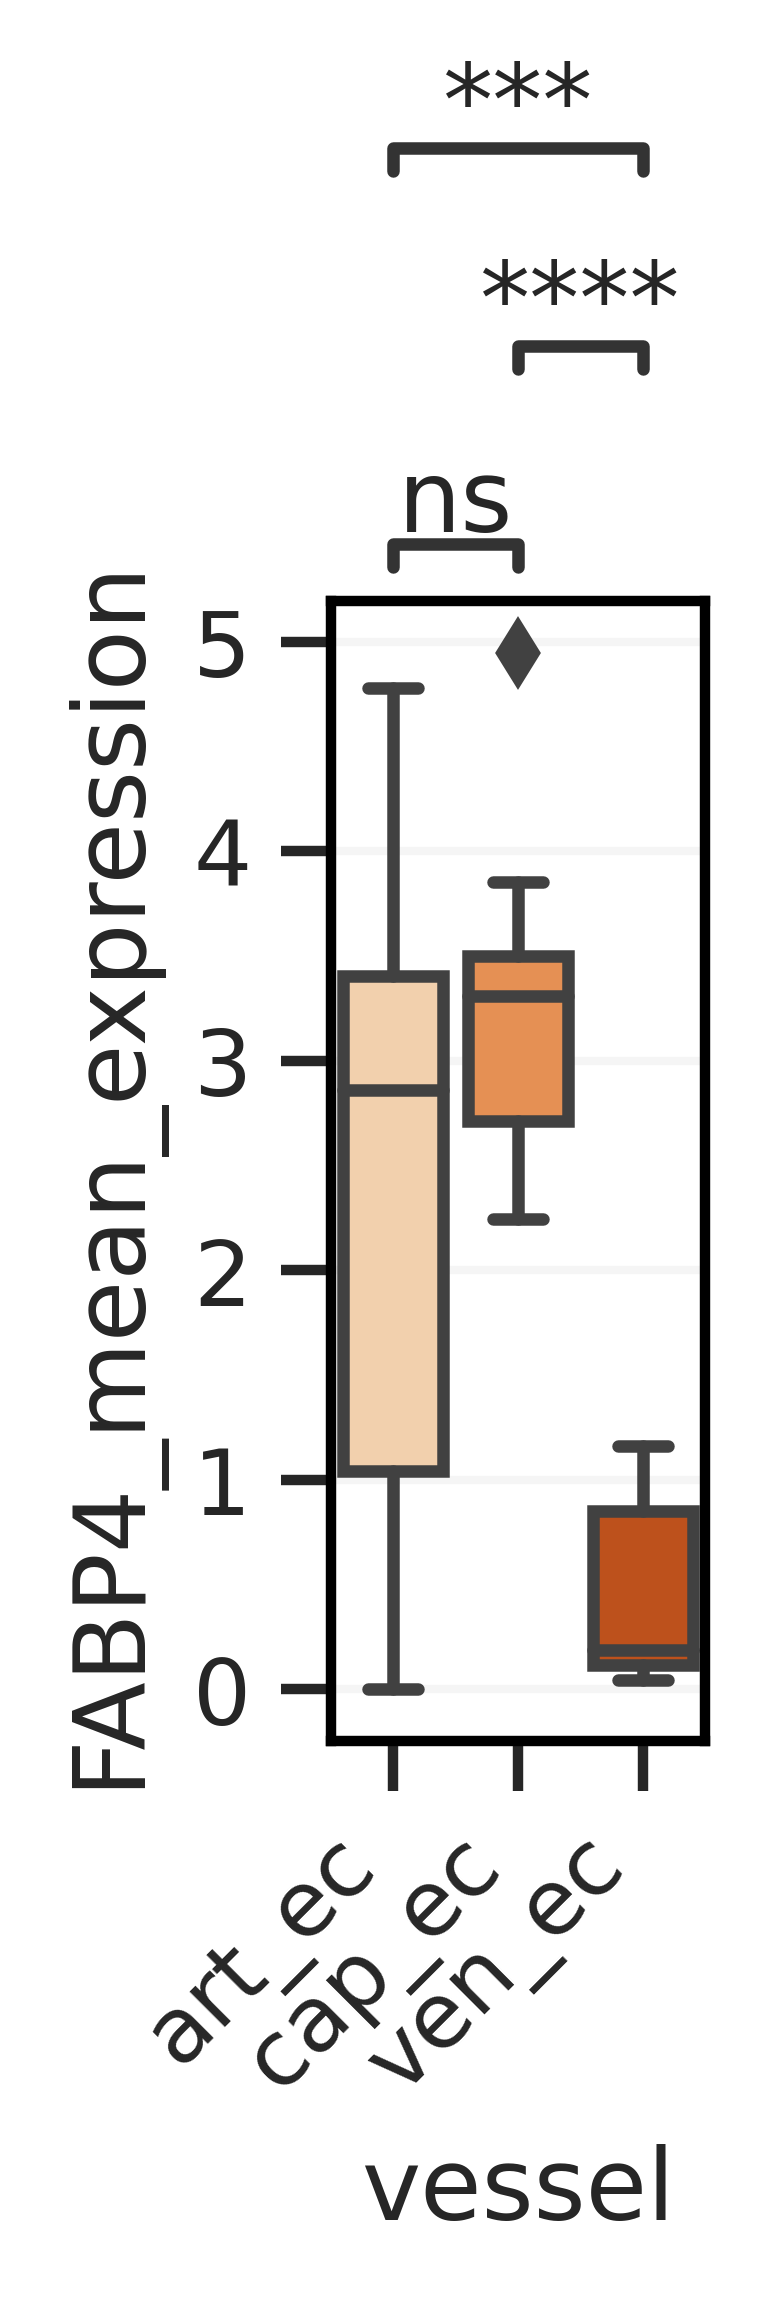

In [90]:
#SULF1 mean expression (bvins only expressed)
ax = sns.boxplot(data = results, x = "vessel", y = "FABP4_mean_expression", palette = 'Oranges', order = ['art_ec','cap_ec','ven_ec'])
annotator = Annotator(ax, pairs, data = results, x = "vessel", y = "FABP4+MEOX2+TCF15_percent", palette = 'Blues', order = ['art_ec','cap_ec','ven_ec'])
annotator.configure(test="Mann-Whitney", text_format = 'star', loc = 'outside', comparisons_correction='benjamini-hochberg', text_offset=-1)
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
#plt.savefig('SULF1_mean_expression', bbox_inches='tight')
plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

art_ec vs. cap_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.588e-01 U_stat=1.600e+02
cap_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.504e-07 U_stat=3.480e+02
art_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.314e-04 U_stat=3.070e+02


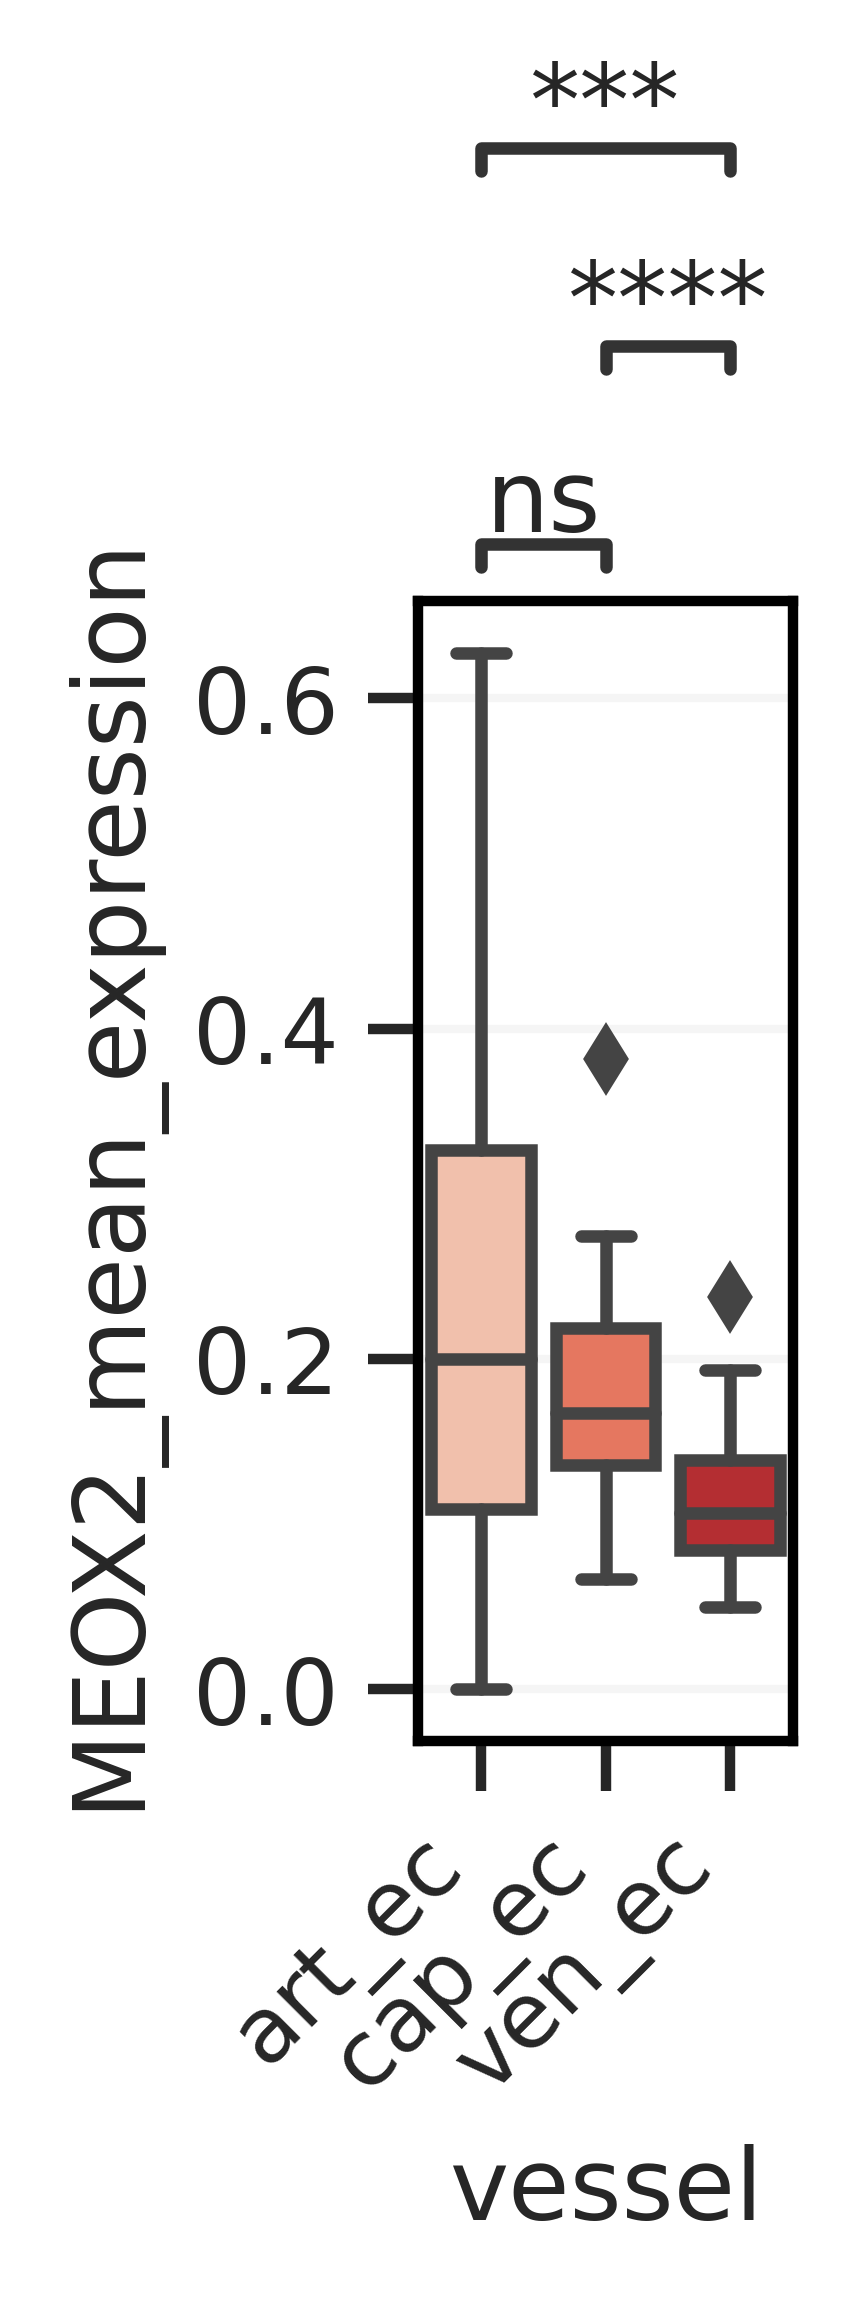

In [91]:
#SULF1 mean expression (bvins only expressed)
ax = sns.boxplot(data = results, x = "vessel", y = "MEOX2_mean_expression", palette = 'Reds', order = ['art_ec','cap_ec','ven_ec'])
annotator = Annotator(ax, pairs, data = results, x = "vessel", y = "FABP4+MEOX2+TCF15_percent", palette = 'Blues', order = ['art_ec','cap_ec','ven_ec'])
annotator.configure(test="Mann-Whitney", text_format = 'star', loc = 'outside', comparisons_correction='benjamini-hochberg', text_offset=-1)
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
#plt.savefig('SULF1_mean_expression', bbox_inches='tight')
plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

art_ec vs. cap_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.588e-01 U_stat=1.600e+02
cap_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.504e-07 U_stat=3.480e+02
art_ec vs. ven_ec: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.314e-04 U_stat=3.070e+02


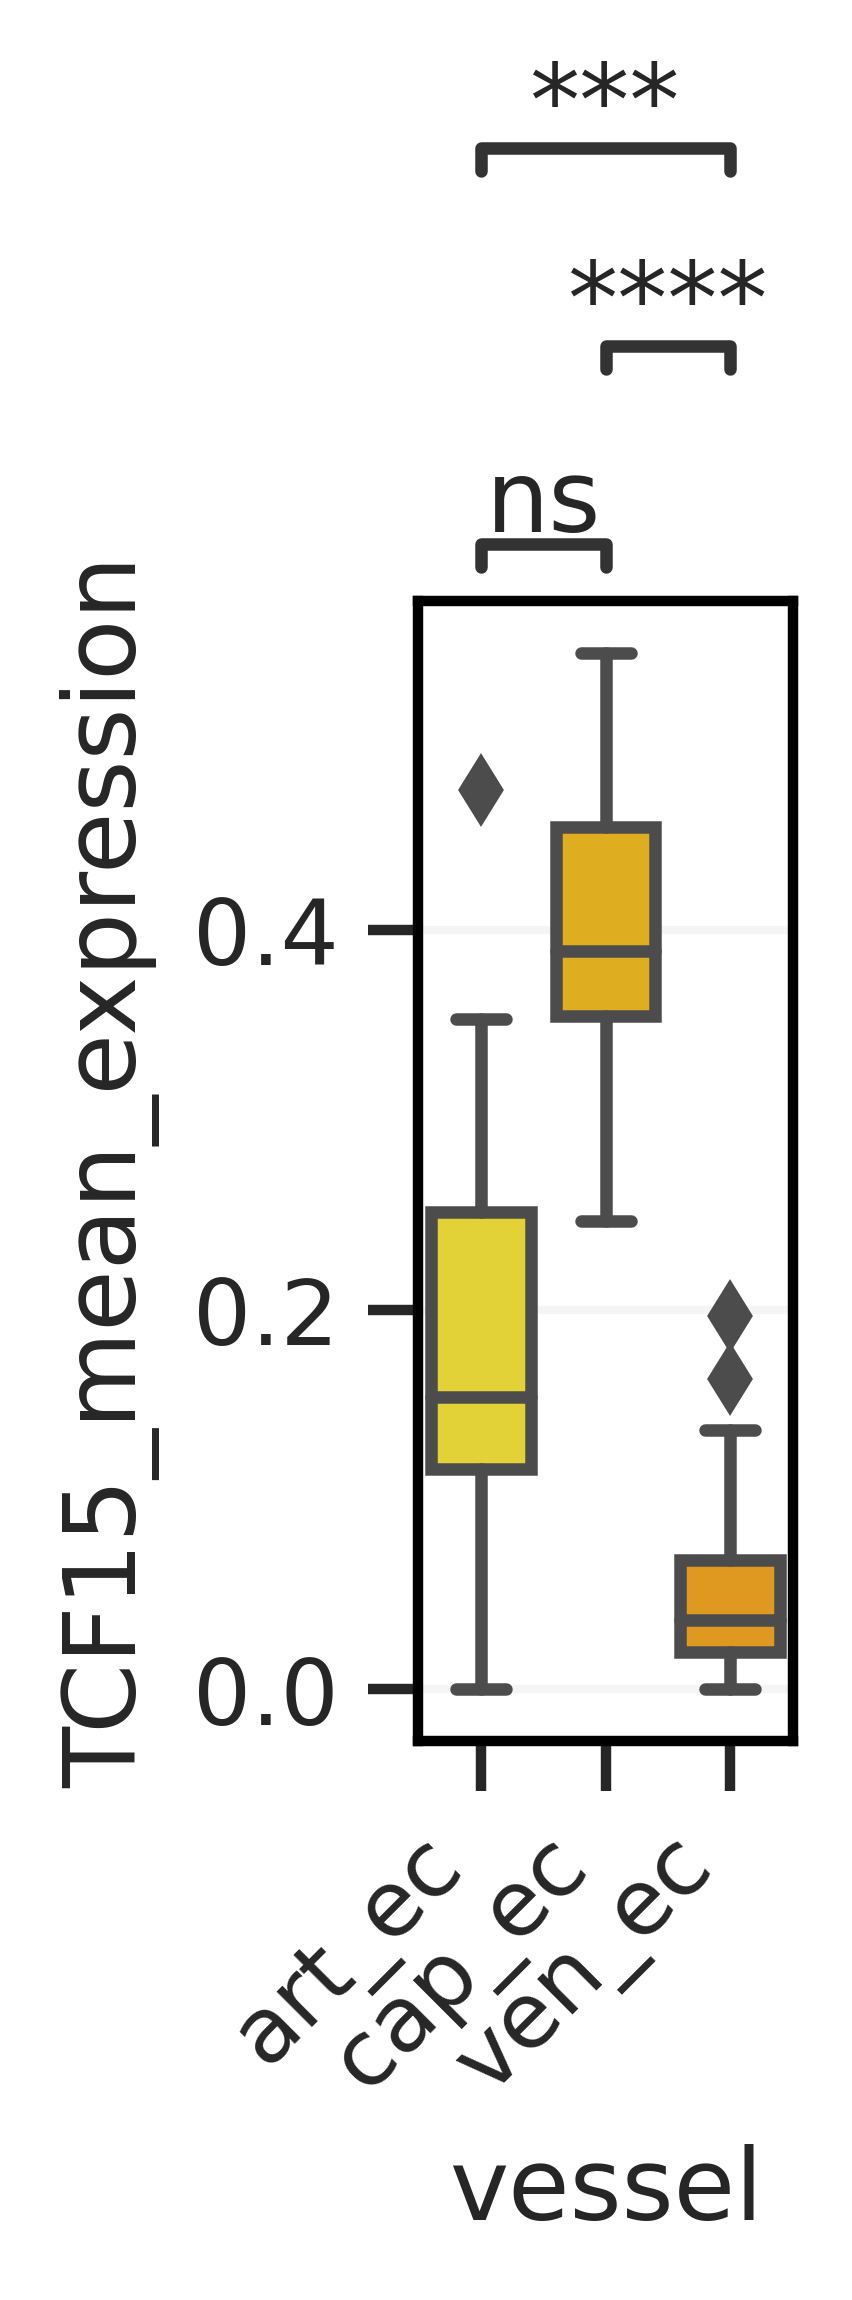

In [92]:
#SULF1 mean expression (bvins only expressed)
ax = sns.boxplot(data = results, x = "vessel", y = "TCF15_mean_expression", palette = 'Wistia', order = ['art_ec','cap_ec','ven_ec'])
annotator = Annotator(ax, pairs, data = results, x = "vessel", y = "FABP4+MEOX2+TCF15_percent", palette = 'Blues', order = ['art_ec','cap_ec','ven_ec'])
annotator.configure(test="Mann-Whitney", text_format = 'star', loc = 'outside', comparisons_correction='benjamini-hochberg', text_offset=-1)
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
#plt.savefig('SULF1_mean_expression', bbox_inches='tight')
plt.show()
